   Time   PIP  DAPE  BAPP
0   0.0  7.92  8.84  7.32
1   0.1  7.92  8.84  7.30
2   0.2  7.92  8.84  7.26
3   0.3  7.92  8.84  7.26
4   0.4  7.92  8.84  7.24


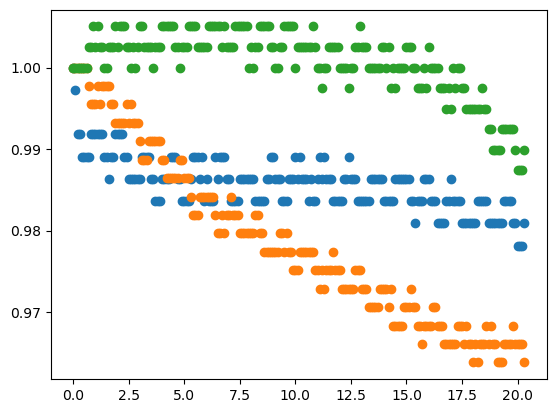

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('LT_DATA.xlsx')
print(df.head())
x = df['Time']
y1 = df['BAPP']
y2 = df['DAPE']
y3 =df['PIP']
BAPP = y1/y1[0]
DAPE = y2/y2[0]
PIP = y3/y3[0]
x = x[0:204]
BAPP = BAPP[0:204]
DAPE = DAPE[0:204]
PIP = PIP[0:204]
plt.scatter(x,BAPP)
plt.scatter(x,DAPE)
plt.scatter(x,PIP)
plt.savefig('BAPP.png')

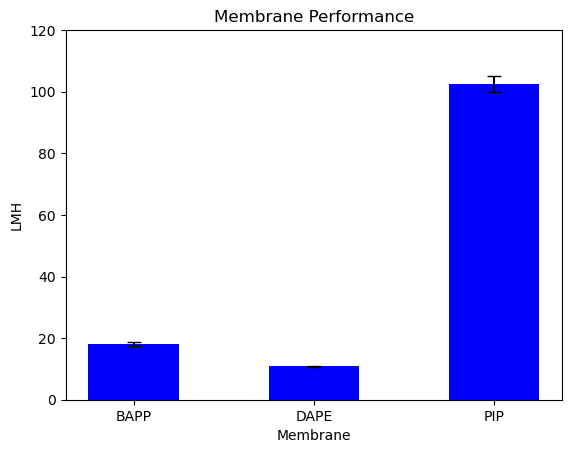

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel('membrane_performance.xlsx')
membrane_data = (df['BAPP'].mean(),df['DAPE'].mean(),df['PIP'].mean()) 
std_dev = [df['BAPP'].std(),df['DAPE'].std(),df['PIP'].std()]
#LMH is Liter per filtration area per hour
g_to_L = 1/1000
area = 0.02**2*np.pi
mintohour = 5/60
LMH_data = [x*g_to_L/area/mintohour for x in membrane_data]
categories = ['BAPP','DAPE','PIP']
plt.bar(categories,LMH_data,yerr=std_dev,capsize = 5,color='blue',width = 0.5)
plt.ylim(0,120)
plt.xlabel('Membrane')
plt.ylabel('LMH')
plt.title('Membrane Performance')
plt.savefig('membrane_performance.png')

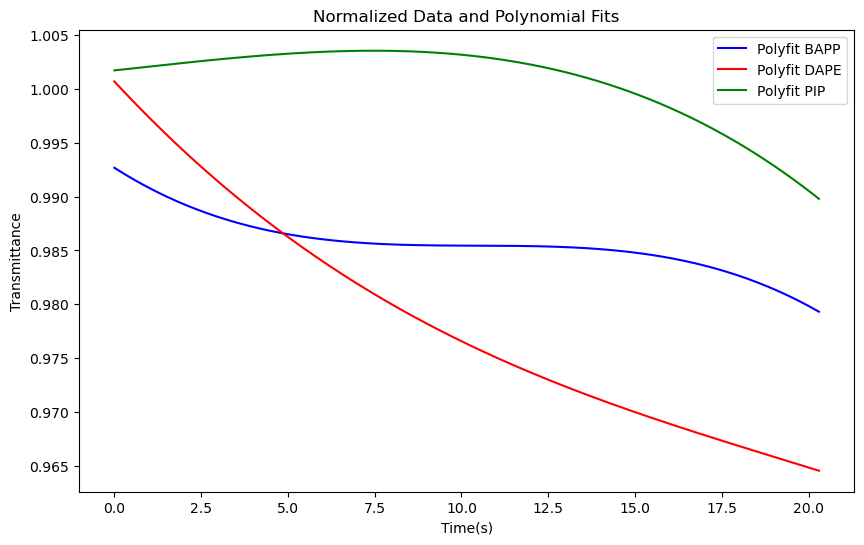

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from Excel file
df = pd.read_excel('LT_DATA.xlsx')

# Extract data columns
x = df['Time']
y1 = df['BAPP']
y2 = df['DAPE']
y3 = df['PIP']

# Normalize data by dividing each series by its initial value
BAPP = y1 / y1.iloc[0]
DAPE = y2 / y2.iloc[0]
PIP = y3 / y3.iloc[0]

# Limit data to the first 204 rows (if necessary)
x = x[:204]
BAPP = BAPP[:204]
DAPE = DAPE[:204]
PIP = PIP[:204]

# Plotting the normalized data
plt.figure(figsize=(10, 6))
# Fit polynomials to the data using numpy.polyfit
degree = 3  # Degree of the polynomial (adjust as needed)
# Fit polynomial curve for BAPP
coeffs_BAPP = np.polyfit(x, BAPP, degree)
poly_BAPP = np.poly1d(coeffs_BAPP)
plt.plot(x, poly_BAPP(x), label='Polyfit BAPP', color='blue')

# Fit polynomial curve for DAPE
coeffs_DAPE = np.polyfit(x, DAPE, degree)
poly_DAPE = np.poly1d(coeffs_DAPE)
plt.plot(x, poly_DAPE(x), label='Polyfit DAPE', color='red')

# Fit polynomial curve for PIP
coeffs_PIP = np.polyfit(x, PIP, degree)
poly_PIP = np.poly1d(coeffs_PIP)
plt.plot(x, poly_PIP(x), label='Polyfit PIP', color='green')

# Customize plot
plt.xlabel('Time(s)')
plt.ylabel('Transmittance')
plt.title('Normalized Data and Polynomial Fits')
plt.legend()

plt.savefig('polyfit_plot.png')
# Show plot
plt.show()